In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [106]:
# defining globals 
G = 1.0 # gravitational constant can be toggled to 1 for simplicity
m1=5.0 # mass of first body
m2=6.0 # mass of second body
d=6 # distance between body1 and body2
mu=m2/(m1+m2) # mass ratio

In [107]:
# calculate derivatives 
def calculateDerivatives(x_coord,y_coord):
    r1=np.sqrt(((x_coord+(mu*d))**2)+y_coord**2)
    r2=np.sqrt((x_coord-(1-mu)*d)**2 + y_coord**2)
    dphi_dx=(-G * m1 *(x_coord+mu*d))/r1**3 - (G * m2 * (x_coord-(1-mu)*d))/r2**3 + x_coord
    dphi_dy=(-G*m1*y_coord)/r1**3 - (G*m2*y_coord)/r2**3 + y_coord

    return dphi_dx , dphi_dy

In [108]:
def EquationsOfmotion(time_steps, current_state):
    x_coord,y_coord,vx,vy=current_state  # unpacking the current state as x,y,vx,vy
    dphi_dx,dphi_dy=calculateDerivatives(x_coord,y_coord)

    dx_dt=vx
    dy_dt=vy

    dvx_dt=2*vy+dphi_dx 
    dvy_dt=-2*vx+dphi_dy

    return [dx_dt,dy_dt,dvx_dt,dvy_dt]



In [115]:
# initial conditions 
x0=2.0
y0=8.0
vxo=20.0
vy0=30.0

time_span=[0,100]
time_steps=np.linspace(time_span[0],time_span[1],1000)
initial_state = [x0,y0,vxo,vy0]

# solving the equations of motion
solution = solve_ivp(EquationsOfmotion,time_span,initial_state,t_eval=time_steps,method='RK45')
print(solution)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e-01 ...  9.990e+01  1.000e+02]
        y: [[ 2.000e+00  4.305e+00 ... -8.209e+02 -4.851e+02]
            [ 8.000e+00  1.083e+01 ...  3.323e+03  3.391e+03]
            [ 2.000e+01  2.596e+01 ...  3.314e+03  3.386e+03]
            [ 3.000e+01  2.633e+01 ...  8.540e+02  5.189e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 632
     njev: 0
      nlu: 0


In [116]:
x,y=solution.y[0],solution.y[1]
print(x,y)

[ 2.00000000e+00  4.30457101e+00  7.17827501e+00  1.05590578e+01
  1.43747940e+01  1.85433283e+01  2.29724755e+01  2.75631285e+01
  3.22124252e+01  3.68108427e+01  4.12490410e+01  4.54180333e+01
  4.92091864e+01  5.25143761e+01  5.52354244e+01  5.72755425e+01
  5.85443407e+01  5.89643072e+01  5.84708083e+01  5.70120879e+01
  5.45493535e+01  5.10623129e+01  4.65372582e+01  4.09728506e+01
  3.43865133e+01  2.68144313e+01  1.83115512e+01  8.95158185e+00
 -1.17302607e+00 -1.19612798e+01 -2.33047199e+01 -3.50804455e+01
 -4.71558225e+01 -5.93884829e+01 -7.16263254e+01 -8.37075150e+01
 -9.54604833e+01 -1.06715848e+02 -1.17320620e+02 -1.27105443e+02
 -1.35910183e+02 -1.43585164e+02 -1.49991171e+02 -1.54999449e+02
 -1.58491703e+02 -1.60360098e+02 -1.60526586e+02 -1.58926879e+02
 -1.55499547e+02 -1.50208880e+02 -1.43044888e+02 -1.34023305e+02
 -1.23185583e+02 -1.10598898e+02 -9.63561471e+01 -8.05702672e+01
 -6.33631052e+01 -4.48759200e+01 -2.52685752e+01 -4.71950639e+00
  1.65742787e+01  3.83972

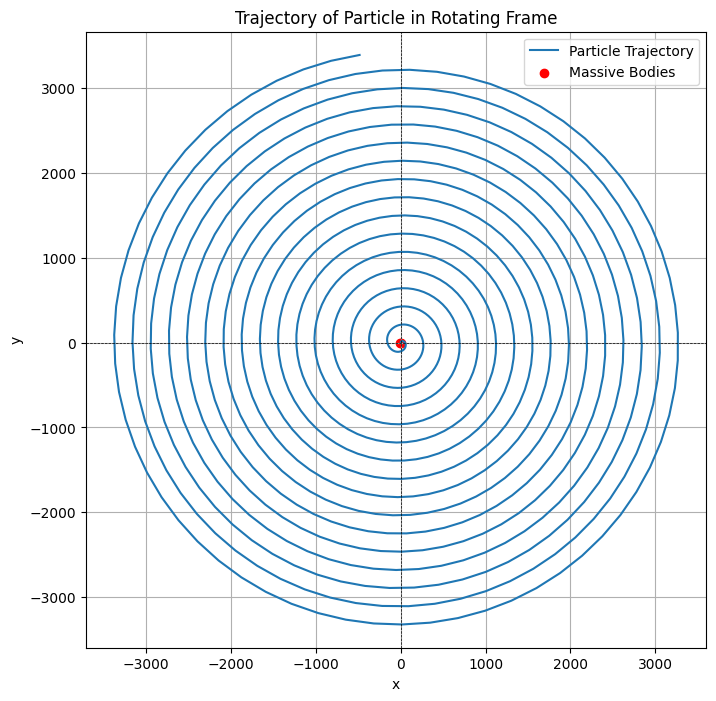

In [117]:
plt.figure(figsize=(8, 8))
plt.plot(x, y, label="Particle Trajectory")
plt.scatter([-mu * d, (1 - mu) * d], [0, 0], color="red", label="Massive Bodies")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory of Particle in Rotating Frame")
plt.legend()
plt.grid()
plt.axis("equal")
plt.show()